In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

from monitrix.model import dnyolocr

In [ ]:
model = dnyolocr.DNYOLOCR()

---

In [ ]:
image_path = ...
results = model.predict(image_path)

In [5]:
results[0].values()

[{main screen(0.97): {oxygen%(0.88): [21.0(1.00)],
   MV L/min(0.89): [7.48(0.68)],
   VT mL(0.87): [497.0(0.99)],
   breathing rate(0.83): [15.0(1.00)]}}]

In [6]:
results[0].recodes()

[recode(screen='main screen', screen_prob=0.9711247, label='oxygen%', label_prob=0.88124907, number=21.0, number_prob=0.9999967125473989, screen_id=0),
 recode(screen='main screen', screen_prob=0.9711247, label='MV L/min', label_prob=0.8946293, number=7.48, number_prob=0.6783296160267587, screen_id=0),
 recode(screen='main screen', screen_prob=0.9711247, label='VT mL', label_prob=0.87192273, number=497.0, number_prob=0.9918635487556458, screen_id=0),
 recode(screen='main screen', screen_prob=0.9711247, label='breathing rate', label_prob=0.83198774, number=15.0, number_prob=0.9998861211145951, screen_id=0)]

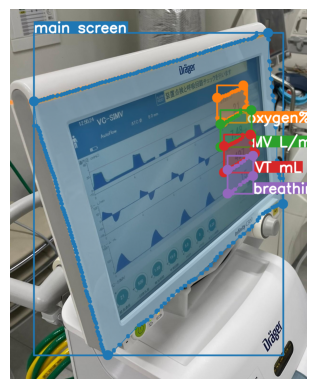

In [14]:
plt.imshow(results[0].draw("yolo",screen_numbers_margin=100))
plt.axis("off")
plt.show()

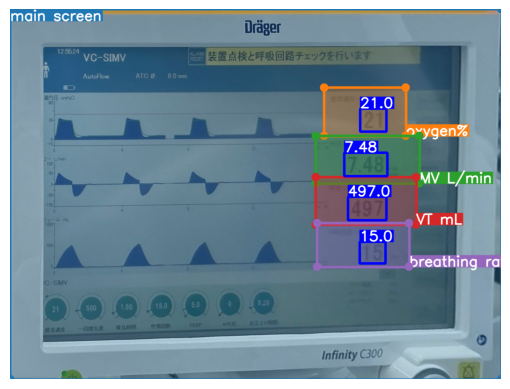

In [15]:
plt.imshow(results[0].draw("ocr"))
plt.axis("off")
plt.show()

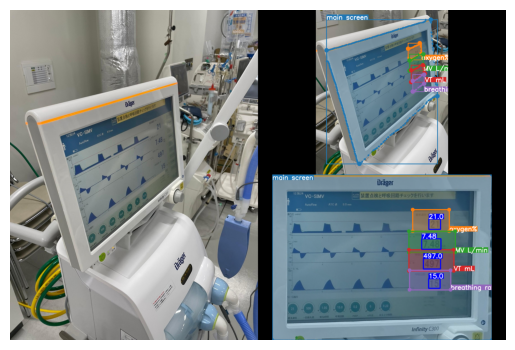

In [16]:
plt.imshow(results[0].draw("total",screen_numbers_margin=100))
plt.axis("off")
plt.show()

---

In [ ]:

video_path = ...
save_path = ...

results = model.predict_video(video_path, save_path)

In [6]:
from monitrix.core.results import recode
from dataclasses import dataclass, asdict

@dataclass(frozen=True)
class i_recode(recode):
    result_id:int

recodes = []
for r_id, result in enumerate(results):
    recodes += [ i_recode(**asdict(r), result_id=r_id) for r in result.recodes()]

recodes[:3]

[i_recode(screen='main screen', screen_prob=0.96835774, label='oxygen%', label_prob=0.90166456, number=48.0, number_prob=1.0, screen_id=0, result_id=0),
 i_recode(screen='main screen', screen_prob=0.96835774, label='MV L/min', label_prob=0.9226238, number=7.38, number_prob=0.9999167323112488, screen_id=0, result_id=0),
 i_recode(screen='main screen', screen_prob=0.96835774, label='VT mL', label_prob=0.91245466, number=491.0, number_prob=0.9583508372306824, screen_id=0, result_id=0)]

In [ ]:
import pandas as pd

df = pd.DataFrame(recodes)
display(df)


,screen,screen_prob,label,label_prob,number,number_prob,screen_id,result_id
0,main screen,0.968358,oxygen%,0.901665,48.00,1.000000,0,0
1,main screen,0.968358,MV L/min,0.922624,7.38,0.999917,0,0
2,main screen,0.968358,VT mL,0.912455,491.00,0.958351,0,0
3,main screen,0.968358,breathing rate,0.914163,15.00,0.999572,0,0
4,main screen,0.967655,oxygen%,0.904266,48.00,1.000000,0,1
...,...,...,...,...,...,...,...,...
914,main screen,0.976309,VT mL,0.933670,491.00,0.999997,0,244
915,main screen,0.976309,breathing rate,0.948634,15.00,0.999928,0,244
916,main screen,0.976429,oxygen%,0.914695,50.00,0.999935,0,245
917,main screen,0.976429,VT mL,0.929438,491.00,0.728075,0,245
